# Telecom Churn Case Study

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [905]:
#Loading required Libraries and importing Dataset

import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, confusion_matrix, recall_score

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [906]:
warnings.filterwarnings('ignore')
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [66]:
# Checking data shape

data_dict.head()

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls


In [67]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.8,308.89,213.47,0.0,0.00,0.0,0.0,35.00,0.0,0.0,35.12,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [68]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [69]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,...,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,0.0,0.0,0.0,169.900601,176.401217,175.118852,...,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,192.831096,201.455940,196.815792,51.773924,51.240204,50.127506,122.171882,128.934444,135.486541,90.069931,89.115767,90.618564,86.863900,85.846074,86.348404,0.025273,0.024069,0.021013,0.079287,0.083401,0.080930,0.388863,0.441406,0.449492,0.075815,0.077730,0.081958,0.075344,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,311.896596,316.818355,322.482226,324.089234,57.374429,55.960985,53.408135,73.469261,58.511894,64.618388,150.971758,154.739002,153.716880,162.046699,153.852597,152.997805,13.319542,13.568110,13.009193,5.741811,7.914113,6.542202,252.034597,246.313148,245.342359,255.098355,266.693254

In [907]:
data = data.drop('circle_id', axis=1)

In [71]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,...,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,...,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,0.0,0.0,0.0,16.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,4.35,...,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.8,308.89,213.47,0.0,0.00,0.0,0.0,35.00,0.0,0.0,35.12,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [72]:
data.select_dtypes(include=['object'])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


# 2. Handling Missing data

lets analyse the missing data.

In [908]:
length = 69999


In [74]:
pd.options.display.max_columns =100

In [909]:
# Checking how much data is missing/null

print(100*(data.isnull().sum()/length))

id                      0.000000
loc_og_t2o_mou          1.002871
std_og_t2o_mou          1.002871
loc_ic_t2o_mou          1.002871
last_date_of_month_6    0.000000
                          ...   
aon                     0.000000
aug_vbc_3g              0.000000
jul_vbc_3g              0.000000
jun_vbc_3g              0.000000
churn_probability       0.000000
Length: 171, dtype: float64


In [910]:
# Saving those columns which have more than 40% missing values in a variable and droping those columns

col = 100*(data.isnull().sum()/length)>40
null_col = data.loc[:, col]
null_col

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,NaN,7/31/2014,8/21/2014,NaN,7.0,1.0,NaN,25.0,17.0,NaN,6.0,1.0,NaN,1.0,0.0,NaN,135.0,17.0,NaN,21.91,0.00,NaN,60.61,48.00,NaN,0.0,0.0,NaN,1.0,1.0
69995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,6/17/2014,7/13/2014,8/14/2014,1.0,1.0,1.0,179.0,252.0,145.0,0.0,0.0,0.0,1.0,1.0,1.0,179.0,252.0,145.0,150.67,212.18,122.08,150.67,212.17,122.07,0.0,0.0,0.0,1.0,1.0,1.0


In [911]:
data = data.drop(null_col, axis=1)
data.shape

(69999, 141)

In [912]:
# Dropping those columns which have no/less variance 

data = data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','monthly_2g_6','monthly_2g_7','monthly_2g_8'], axis=1)

In [913]:
data = data.drop(['std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_og_t2c_mou_8'], axis=1)

In [914]:
#Checking how much columns are having null/missing values

dt = 100*data.isnull().sum()/length != 0.0
null_col2 = data.loc[:, dt]
null_col2.describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8
count,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000
mean,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,169.900601,176.401217,175.118852,0.845763,0.811100,0.841648,3.958619,4.976783,5.045027,0.462581,0.024425,0.033059,48.043255,47.882736,47.256388,107.152439,106.489856,108.154731,12.050672,12.563665,11.716763,167.255126,166.945103,167.136761,9.476958,9.873468,9.910217,20.734858,21.685359,21.089042,2.146273,2.199395,2.075179,32.360632,33.760809,33.077030,0.061932,0.033371,0.040392,7.394167,8.171162,8.348424,0.854063,1.019680,0.963214
std,299.963093,311.277193,311.896596,316.818355,322.482226,324.089234,57.374429,55.960985,53.408135,73.469261,58.511894,64.618388,150.971758,154.739002,153.716880,162.046699,153.852597,152.997805,13.319542,13.568110,13.009193,5.741811,7.914113,6.542202,252.034597,246.313148,245.342359,255.098355,266.693254,267.021929,255.771554,267.532089,270.032002,8.136645,8.325206,392.046600,409.299501,410.697098,29.747486,29.220073,29.563367,15.854529,22.229842,17.708507,4.768437,1.716430,2.232547,140.499757,147.761124,141.249368,168.455999,165.452459,166.223461,39.416076,43.495179,38.606895,252.576231,254.688718,249.288410,51.664472,56.137824,54.248186,80.294236,87.314510,81.534344,16.522232,16.171533,15.865403,104.381082,114.142230,108.469864,0.164823,0.137322,0.148417,60.951165,63.604165,63.097570,12.149144,13.225373,11.697686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [915]:
# imputing Missing NaN/Null values with mean of the column

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [916]:
# imputing Missing NaN/Null values with mean of the column cont..

missing_data_percent = data.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'lo

In [917]:
data[impute_cols] = imputer.fit_transform(data[impute_cols])

In [918]:
#checking how much missing data is present

null_col = 100*(data.isnull().sum()/length) != 0
null_col = data.loc[:, col]
null_col

""
0
1
2
3
4
...
69994
69995
69996
69997


In [919]:
#dropping id since its not useful for our analysis

data = data.drop('id', axis=1)

# 3. Preprocessing and EDA

<Axes: >

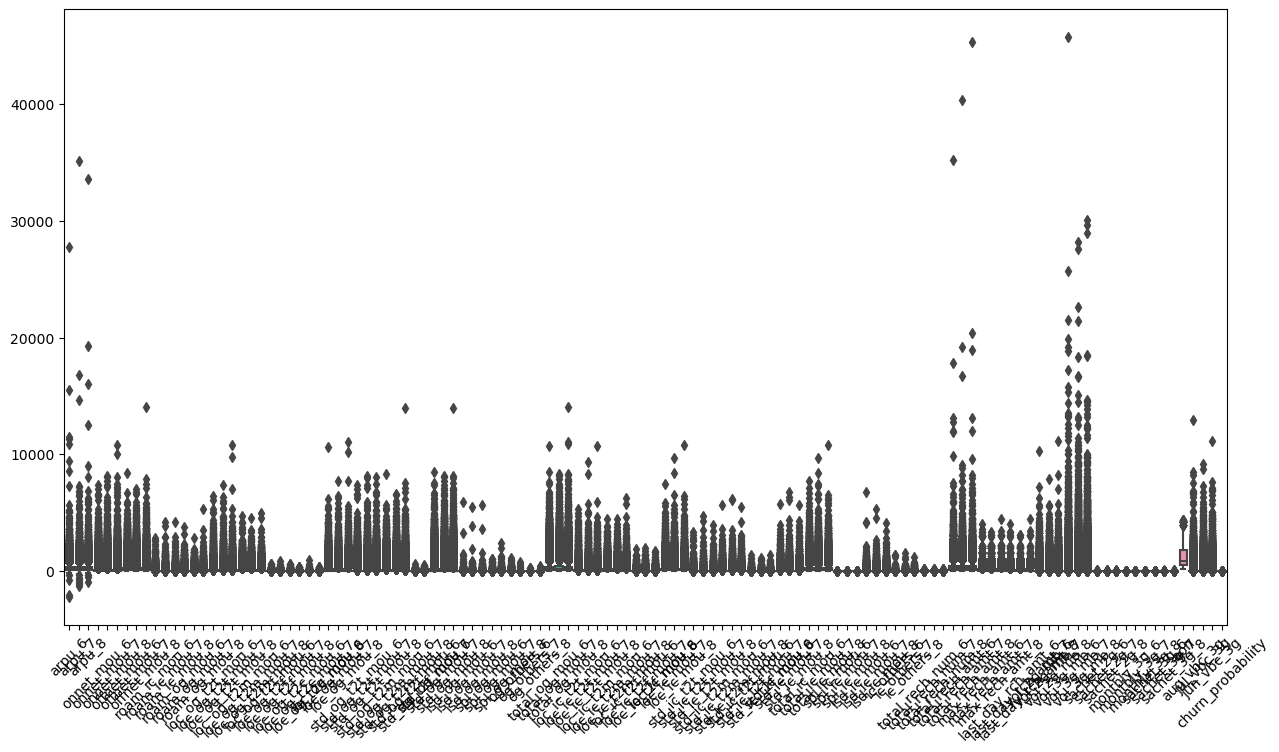

In [86]:
# Building a boxplot graph to see the spread of the data in the dataset

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data)

In [322]:
#from sklearn.utils import resample
#unsampled  =resample(data[data['churn_probability']==1],
#        replace=True,
#        n_samples=int(data[data['churn_probability']==0].shape[0]/10),random_state=42)
#new_unsampled = pd.concat((data[data['churn_probability']==0],unsampled),axis=0)

In [920]:
# Creating X any y variable with x containing all predictor variables and y containing target variable

X = data.drop('churn_probability', axis=1)

y = data['churn_probability']

print(X.shape)
print(y.shape)

(69999, 120)
(69999,)


In [370]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,...,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,...,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,...,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,...,2.81,0.0,0.0,0.0,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,110,110,50,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,982,0.0,0.0,0.0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.0,0.00,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,13,10,8,290,136,122,50,41,30,25,10,30,390.8,308.89,213.47,0.0,0.00,0.0,7,6,6,0,0,0,0,1,0,647,0.0,0.0,0.0


In [921]:
#Scaling Preddictor vaariables(X) with MinMaxScaler

cols = X.columns
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])

In [372]:
X.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,...,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,...,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,69153.000000,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04,6.915300e+04
mean,-2.383785e-16,-8.713147e-17,1.117913e-16,6.247162e-17,-6.781459e-17,-1.561790e-17,3.370179e-17,-6.308811e-17,-4.931970e-17,2.794783e-17,-3.287980e-18,-3.123581e-17,-1.808389e-17,9.863940e-18,-6.575960e-18,1.397391e-17,9.041945e-18,-1.068593e-17,8.055551e-17,-3.287980e-18,2.137187e-17,-2.876982e-17,-6.658159e-17,9.863940e-18,4.068875e-17,2.424885e-17,2.486535e-17,-2.959182e-17,-1.134353e-16,7.726753e-17,-3.287980e-18,3.287980e-18,-2.342686e-17,-2.465985e-17,1.808389e-17,-1.890588e-17,3.082481e-17,-3.698977e-18,1.643990e-17,5.753965e-18,-6.247162e-17,-2.876982e-18,-1.489866e-18,3.904476e-18,1.315192e-17,4.109975e-18,-2.548184e-17,8.219950e-19,3.082481e-18,3.390729e-18,...,6.082763e-17,-5.342967e-18,-9.452942e-18,-9.452942e-18,3.657878e-17,-9.863940e-18,-4.438773e-17,4.931970e-17,2.959182e-17,2.630384e-17,2.219386e-17,3.041381e-17,-1.232992e-17,2.424885e-17,-9.632754e-18,1.479591e-17,8.014451e-18,-1.808389e-17,1.212443e-17,2.794783e-17,6.575960e-18,-4.931970e-17,-1.726189e-17,4.767571e-17,4.931970e-17,2.712583e-17,1.479591e-17,-1.315192e-17,1.931688e-17,0.000000,3.945576e-17,-3.267430e-17,-2.876982e-17,-2.137187e-17,4.479873e-17,-1.808389e-17,-8.219950e-18,2.085812e-17,9.041945e-18,1.643990e-17,-1.006944e-17,5.425167e-17,-1.315192e-17,4.842064e-17,-2.835883e-17

<Axes: >

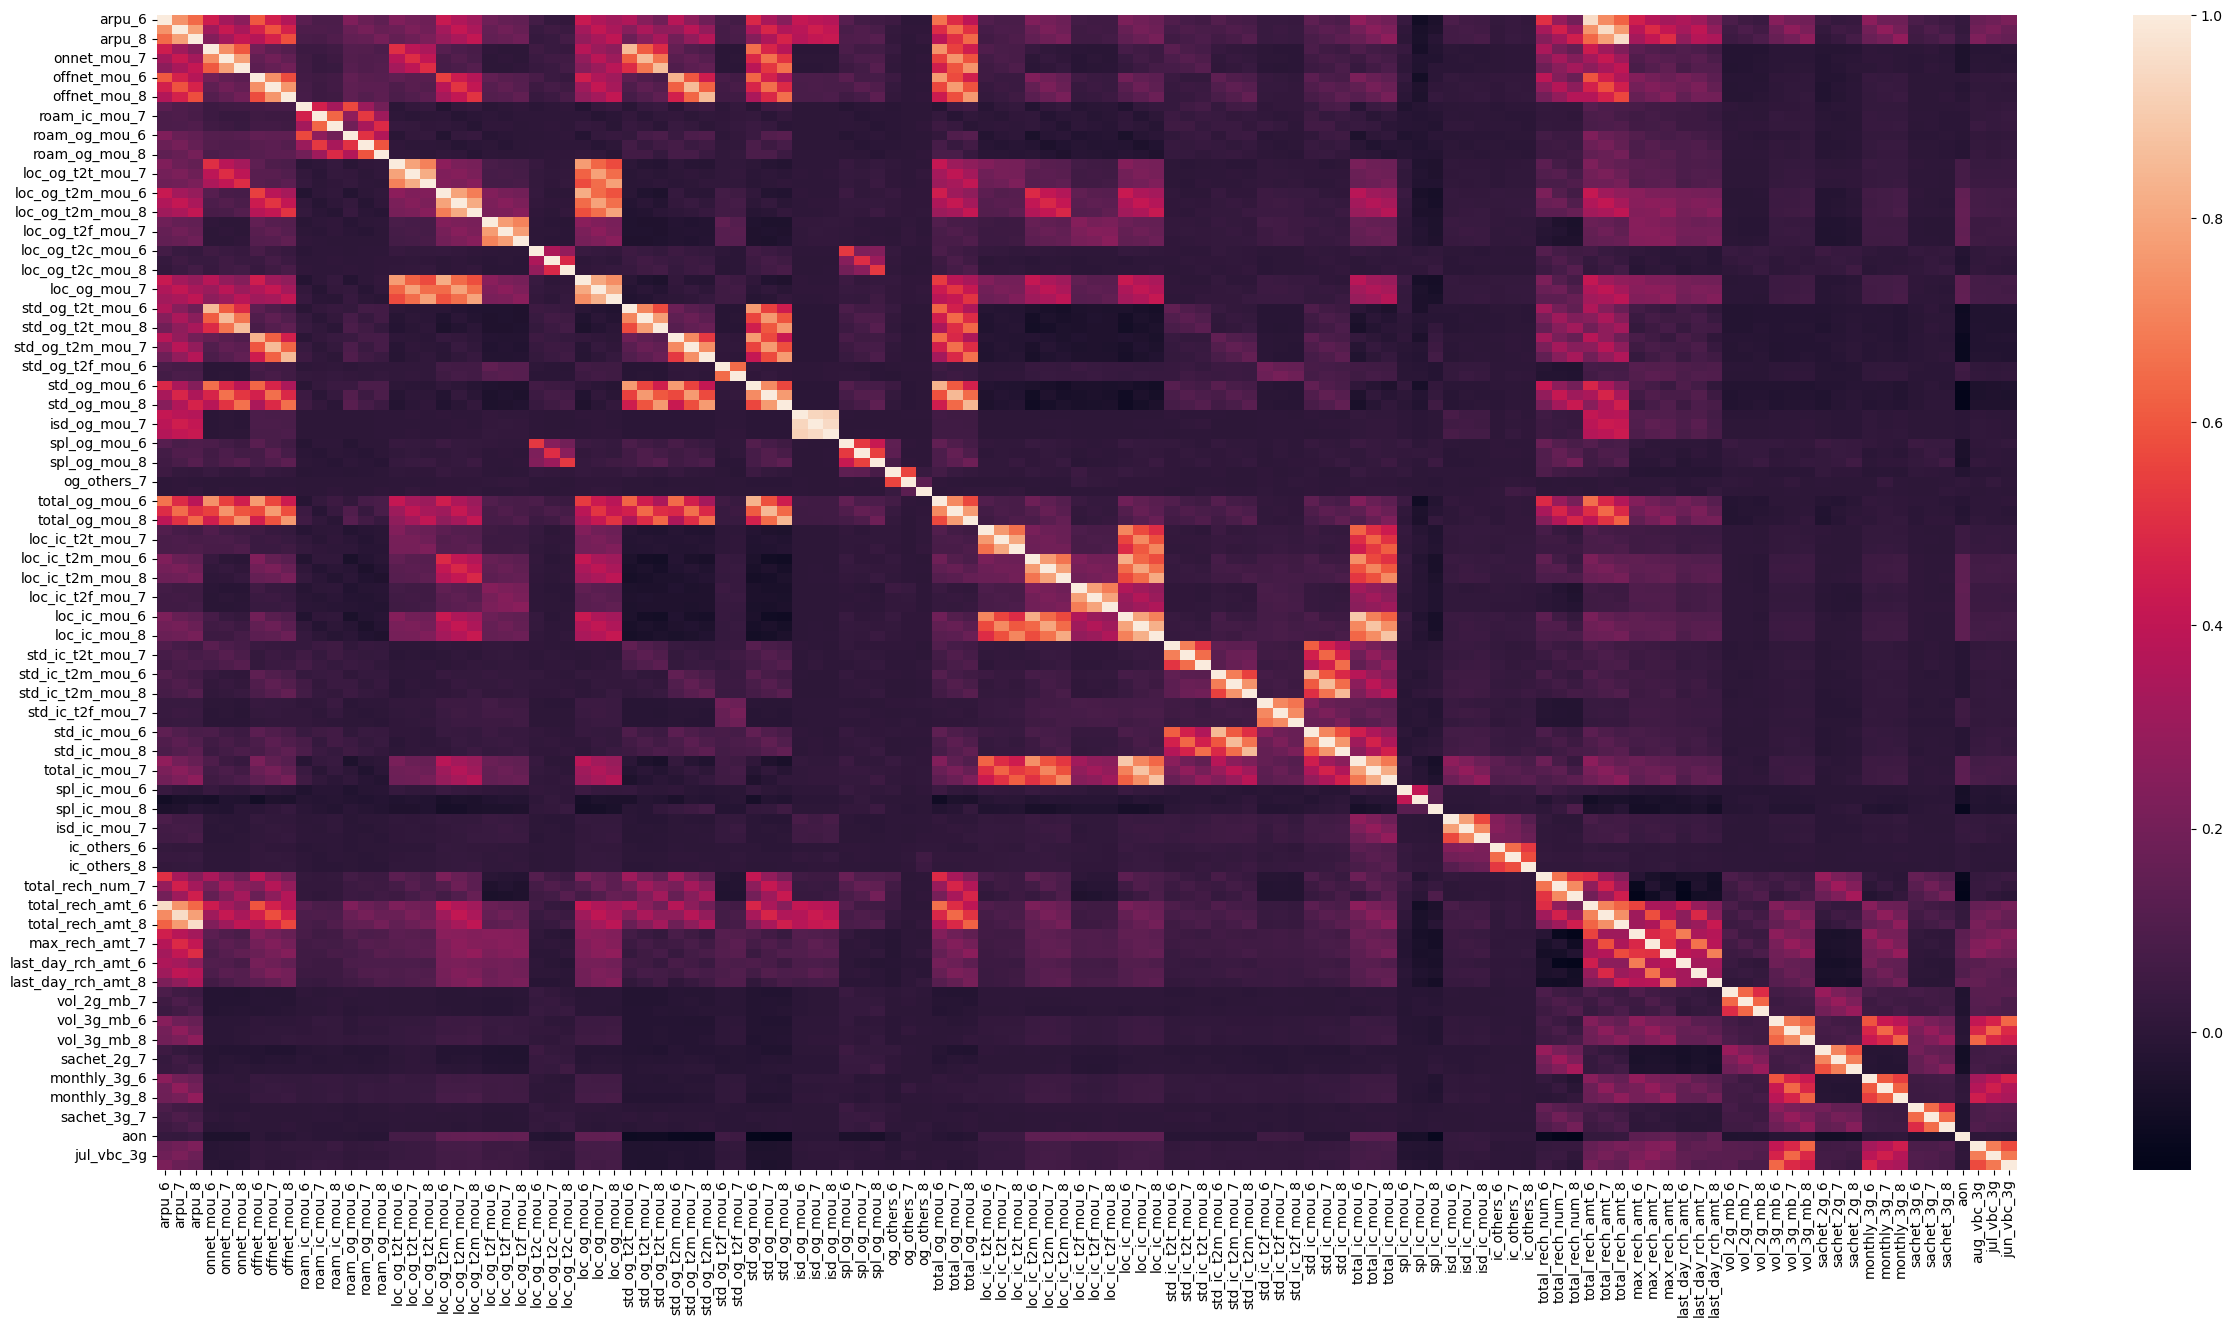

In [28]:
# Building Heatmap to check Corelation between Perdictor variables

plt.figure(figsize=(30,15))
sns.heatmap(X.corr())

In [922]:
# Building test and train data with 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 120), (14000, 120), (55999,), (14000,))

In [327]:
def eval_met(model):
    print("Accuracy")
    print(model.score(X_train, y_train))
    print(model.score(X_test, y_test))
    print('-'*20)
    print("Precision")
    print(precision_score(y_train, model.predict(X_train)))
    print(precision_score(y_test, model.predict(X_test)))
    print('-'*20)
    print("F1 Score")
    print(f1_score(y_train, model.predict(X_train)))
    print(f1_score(y_test, model.predict(X_test)))
    print('-'*20)
    print("Roc AUC Score")
    print(roc_auc_score(y_train, model.predict(X_train)))
    print(roc_auc_score(y_test, model.predict(X_test)))
    print('-'*20)
    print("Recall")
    print(recall_score(y_train, model.predict(X_train)))
    print(recall_score(y_test, model.predict(X_test)))
    print('-'*20)
    print("Confusion Matrix")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print('-----')
    print(confusion_matrix(y_test, model.predict(X_test)))


<Axes: xlabel='churn_probability', ylabel='Count'>

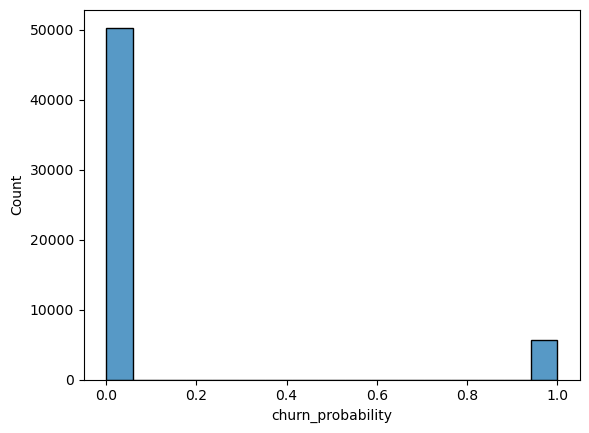

In [23]:
# building a Histplot to check the balance between 0 and 1 value of churn probability

sns.histplot(y_train)

# 4.0 Feature engineering and selection

In [31]:
# building Random forest classifier model and fitting the data to do feature importance

rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [32]:
# Creating a dataframe to store all column names in col and its corresponding importance in the importance column and sorting it
# by descending

feature_importances = pd.DataFrame({'col':cols, 'importance':rf.feature_importances_})
feature_importances.sort_values(by = 'importance', ascending=False)

,col,importance
49,og_others_8,0.120237
79,total_ic_mou_8,0.074685
11,roam_ic_mou_8,0.044052
43,isd_og_mou_8,0.032638
94,total_rech_amt_8,0.027019
...,...,...
111,monthly_3g_7,0.000993
113,sachet_3g_6,0.000769
114,sachet_3g_7,0.000644
115,sachet_3g_8,0.000589


### As we can see, total_rech_amt_6, total_rech_num_8 and std_ic_mou_6 are the top 3 important variables. If we look at the data dictonaty, we can understand that the important features are 'Total Recharge Amount in month of June', 'Total Recharge Amount in month of August' and 'minutes spent in incoming calls in standard calls outside calling circle.

### Using the above information, the company can then make an informed decision on where to focus their efforts like they can rollout offers in june and august to still increase the recharge amount and make sure the users can make call in standard ouside cirlces to make more customers not churn.

<BarContainer object of 120 artists>

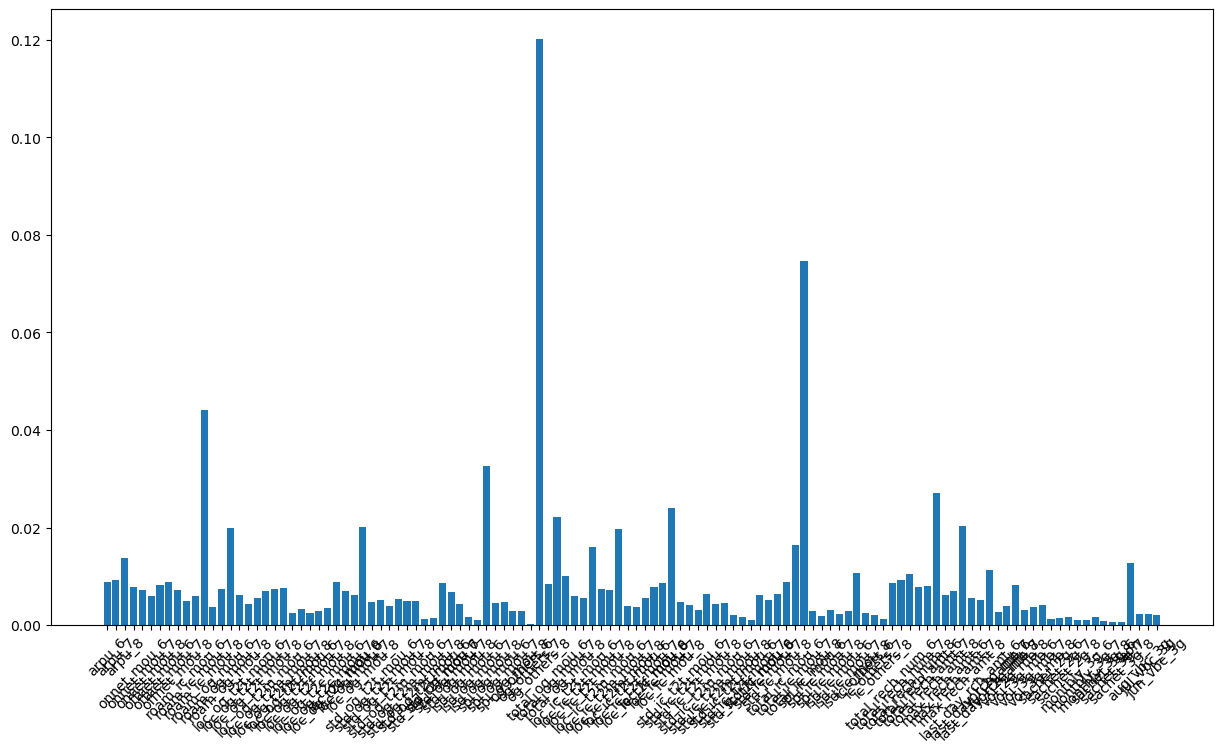

In [33]:
# Bar Graph of all the columns with their feature importance.

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

<Axes: >

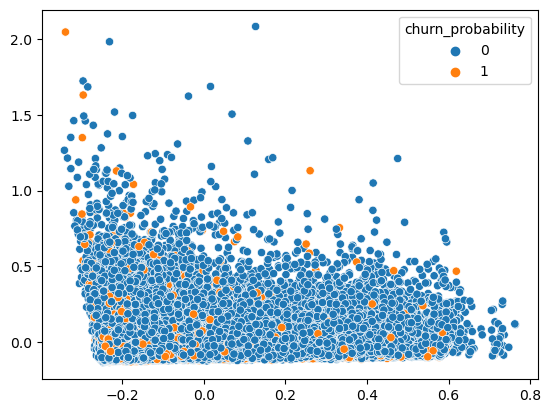

In [34]:
# building and fitting PCA(99% variance) to train data

pca = PCA(0.99)
pca_components = pca.fit_transform(X_train)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

<Axes: >

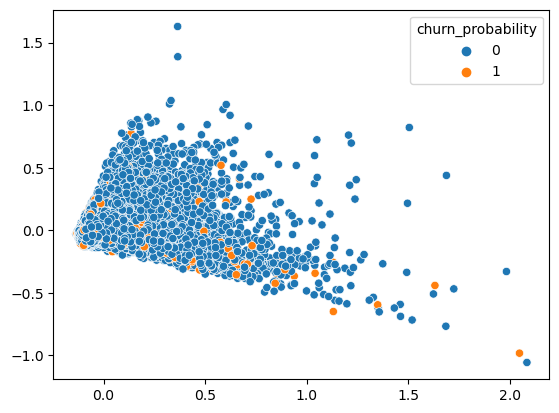

In [35]:
# Scatterplot for pca components

sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

In [36]:
pca_components

array([[ 4.61279978e-01,  3.14167968e-02, -6.30475413e-02, ...,
        -2.93843709e-03, -4.55797332e-03,  8.20454833e-04],
       [ 1.00294824e-01, -5.78860275e-02,  8.32417930e-03, ...,
        -1.89913221e-03,  1.25792700e-03, -7.96193740e-04],
       [-4.25584130e-03,  7.36605078e-01, -2.61259736e-01, ...,
         5.92611857e-03,  1.12359478e-04, -7.85830454e-03],
       ...,
       [-1.08050433e-01, -5.90467031e-02,  2.69376100e-02, ...,
         1.68493255e-03,  2.47573158e-03,  7.08434070e-04],
       [-9.62264271e-02,  7.04583008e-02,  2.16762872e-01, ...,
         1.72440570e-02, -2.67889848e-03,  3.65437673e-03],
       [-9.85766637e-02,  2.25690840e-02,  7.24651068e-02, ...,
        -1.15747660e-03, -4.62765400e-03, -2.99548108e-03]])

In [37]:
rf.feature_importances_

array([0.00891568, 0.0092161 , 0.01383768, 0.00783837, 0.0071882 ,
       0.00600852, 0.00829862, 0.00893757, 0.00722802, 0.00500594,
       0.00602194, 0.04405204, 0.00376937, 0.00740228, 0.0199395 ,
       0.00625647, 0.0042633 , 0.00556599, 0.00695667, 0.00733224,
       0.00771876, 0.00256777, 0.00326335, 0.00257698, 0.00301219,
       0.00344154, 0.00887458, 0.00696423, 0.00612621, 0.02012593,
       0.00483904, 0.00526046, 0.00386683, 0.00541639, 0.00504283,
       0.00504032, 0.00124656, 0.00144483, 0.00873482, 0.00678786,
       0.00443463, 0.00162306, 0.00100437, 0.03263775, 0.00452297,
       0.00468201, 0.00299446, 0.0028535 , 0.00017568, 0.12023661,
       0.00846109, 0.02216928, 0.01004931, 0.00598366, 0.00554927,
       0.01613141, 0.00744361, 0.00714902, 0.01974831, 0.00388948,
       0.00381138, 0.00552766, 0.00781904, 0.00856145, 0.02396611,
       0.00475934, 0.00421064, 0.0031891 , 0.0063391 , 0.00429662,
       0.00446557, 0.00199919, 0.00164898, 0.00106295, 0.00624

<BarContainer object of 66 artists>

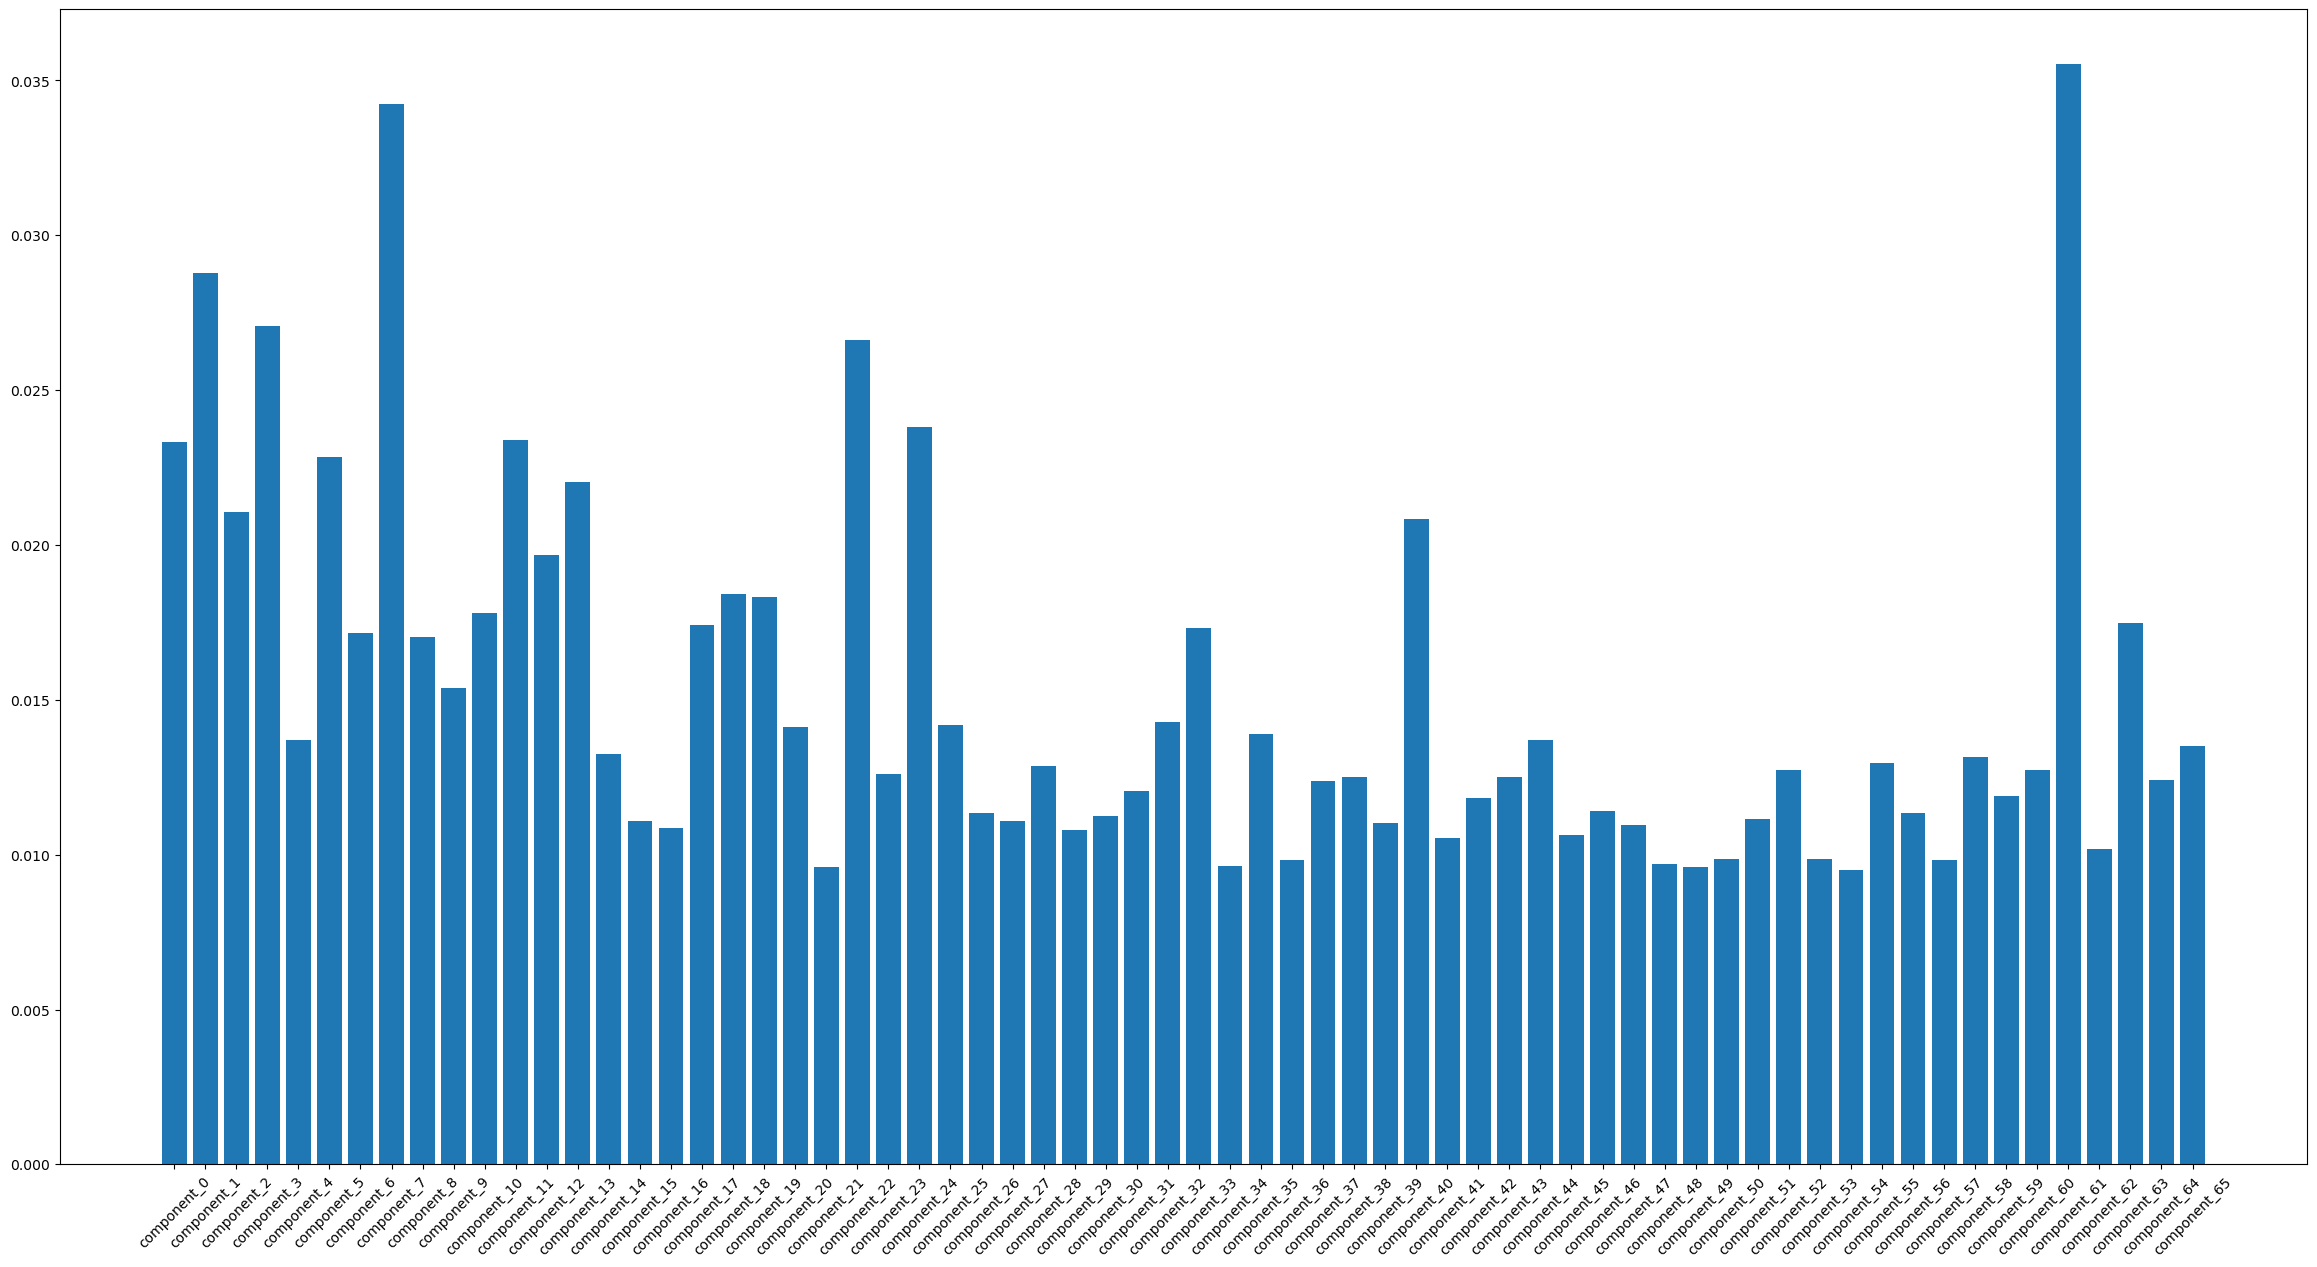

In [38]:
# Building a graph of all columns with their feature importance

rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rf.fit(pca_components, y_train)

feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(66)], 
                                    'importance':rf.feature_importances_})

plt.figure(figsize=(29,15))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

# 5. Building the prediction model.

### 1.0 Logistic Regression model(base model)

In [755]:
# Building the model

lr = LogisticRegression(random_state=42)

In [756]:
#Fitting the model to X and y train data

lr.fit(df_train_pca, y_train)

LogisticRegression(random_state=42)

In [758]:
# Checking model accuracy on training data

lr.score(df_train_pca, y_train)

0.9270522687905142

In [759]:
# Checking model accuracy on testing data

lr.score(X_test, y_test)

ValueError: X has 120 features, but LogisticRegression is expecting 92 features as input.

### 2.0 Random Forest model with Grid search cv and cross validation.

In [36]:
rf = RandomForestClassifier(random_state=42)

In [61]:
params = {
    'n_estimators' : [40, 50, 60, 70, 80, 90, 100, 110],
    'min_samples_split' : [6,7,8,9,10,11, 12],
    'min_samples_leaf' : [8,9,10,11, 12, 13],
    'max_depth' : [9,10,11, 12, 13],
    'max_features' : [8, 9,10,11,12,13,14, 15],
    'bootstrap' : [True, False]
}

In [62]:
random = RandomizedSearchCV(rf, 
                   param_distributions=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

In [63]:
%%time
random.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
CPU times: total: 51.7 s
Wall time: 8min 12s


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [9, 10, 11, 12, 13],
                                        'max_features': [8, 9, 10, 11, 12, 13,
                                                         14, 15],
                                        'min_samples_leaf': [8, 9, 10, 11, 12,
                                                             13],
                                        'min_samples_split': [6, 7, 8, 9, 10,
                                                              11, 12],
                                        'n_estimators': [40, 50, 60, 70, 80, 90,
                                                         100, 110]},
                   scoring='accuracy', verbose=1)

In [64]:
score_df = pd.DataFrame(random.cv_results_)
score_df.nsmallest(5, 'rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,164.812369,2.487761,0.578227,0.033098,80,12,8,14,12,False,"{'n_estimators': 80, 'min_samples_split': 12, ...",0.907671,0.942528,0.940700,0.941971,0.933217,0.014764,1
5,87.972289,2.112702,0.265625,0.015624,40,12,12,15,12,False,"{'n_estimators': 40, 'min_samples_split': 12, ...",0.906479,0.939706,0.939189,0.939865,0.931310,0.014338,2
0,133.054808,5.551312,0.503907,0.041890,70,7,12,13,12,False,"{'n_estimators': 70, 'min_samples_split': 7, '...",0.904968,0.940541,0.938871,0.938951,0.930833,0.014948,3
1,85.393641,1.546548,0.355568,0.035511,50,7,9,14,13,True,"{'n_estimators': 50, 'min_samples_split': 7, '...",0.905604,0.939308,0.937957,0.938474,0.930336,0.014287,4
2,94.097780,1.458649,0.398538,0.023406,60,6,11,13,13,True,"{'n_estimators': 60, 'min_samples_split': 6, '...",0.904412,0.938752,0.936169,0.937321,0.929163,0.014320,5


In [65]:
best_dt = random.best_estimator_


In [66]:
best_dt.score(X_train, y_train)


0.9463918998553545

In [67]:
best_dt.score(X_test, y_test)

0.9240714285714285

In [69]:
# Building the model

rf = RandomForestClassifier(random_state=42)

In [73]:
# different parameters 
params = {
    'n_estimators' : [70, 80],
    'min_samples_split' : [13,12],
    'min_samples_leaf' : [12, 13],
    'max_depth' : [12, 13],
    'max_features' : [13,14],
    'bootstrap' : [True, False]
}

In [74]:
# building Grid function with the parameters saved from before

grid = GridSearchCV(estimator=rf, 
                   param_grid=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


In [75]:
%%time
grid.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 64 candidates, totalling 256 fits
CPU times: total: 59.8 s
Wall time: 54min


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [12, 13],
                         'max_features': [13, 14], 'min_samples_leaf': [12, 13],
                         'min_samples_split': [13, 12],
                         'n_estimators': [70, 80]},
             scoring='accuracy', verbose=1)

In [76]:
# storing the results of the model in a dataframe and getting the top 5 model data based on test score ranking

score_df = pd.DataFrame(grid.cv_results_)
score_df.nsmallest(5, 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
57,176.672593,2.291138,0.576146,0.050518,False,13,14,12,13,80,"{'bootstrap': False, 'max_depth': 13, 'max_fea...",0.908029,0.943442,0.942051,0.942846,0.934092,0.015056,1
59,176.564243,5.021681,0.601883,0.017477,False,13,14,12,12,80,"{'bootstrap': False, 'max_depth': 13, 'max_fea...",0.908029,0.943442,0.942051,0.942846,0.934092,0.015056,1
56,153.154571,2.420265,0.512238,0.035690,False,13,14,12,13,70,"{'bootstrap': False, 'max_depth': 13, 'max_fea...",0.907909,0.942528,0.942091,0.942806,0.933833,0.014969,3
58,153.912689,4.178487,0.520581,0.050630,False,13,14,12,12,70,"{'bootstrap': False, 'max_depth': 13, 'max_fea...",0.907909,0.942528,0.942091,0.942806,0.933833,0.014969,3
49,164.538346,4.753137,0.626768,0.031403,False,13,13,12,13,80,"{'bootstrap': False, 'max_depth': 13, 'max_fea...",0.907552,0.942965,0.942091,0.942448,0.933764,0.015137,5


In [77]:
# Taking the best model from all fiited model

best_dt = grid.best_estimator_

In [78]:
# train score of best fitted model

best_dt.score(X_train, y_train)

0.9480883587206914

In [79]:
# test score of best fitted model

best_dt.score(X_test, y_test)

0.926

### 3.0 AdaBoost Classifier

In [88]:
basedt = DecisionTreeClassifier(max_depth=3)
adaboost =  AdaBoostClassifier(random_state=42, base_estimator=basedt)


In [89]:
params = {
    'n_estimators' : [50, 100, 150, 200],
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5],
}

In [92]:
random = RandomizedSearchCV(adaboost, 
                   param_distributions=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


In [93]:
%%time
random.fit(X_train, y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits
CPU times: total: 1min 20s
Wall time: 21min 19s


RandomizedSearchCV(cv=4,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'n_estimators': [50, 100, 150, 200]},
                   scoring='accuracy', verbose=1)

In [94]:
score_df = pd.DataFrame(random.cv_results_)
score_df.nsmallest(5, 'rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,261.573605,6.007361,1.020347,0.075745,100,0.1,"{'n_estimators': 100, 'learning_rate': 0.1}",0.940429,0.940714,0.940929,0.943425,0.941374,0.001197,1
9,201.626721,3.285113,0.558035,0.053755,100,0.2,"{'n_estimators': 100, 'learning_rate': 0.2}",0.941214,0.939857,0.941429,0.942996,0.941374,0.001114,2
0,399.961034,5.482746,1.455447,0.195771,150,0.1,"{'n_estimators': 150, 'learning_rate': 0.1}",0.940786,0.940643,0.940714,0.943282,0.941356,0.001113,3
1,546.705662,11.934595,1.907089,0.174076,200,0.1,"{'n_estimators': 200, 'learning_rate': 0.1}",0.940357,0.940786,0.940786,0.943353,0.941320,0.001187,4
3,142.399489,3.951736,0.488362,0.046899,50,0.3,"{'n_estimators': 50, 'learning_rate': 0.3}",0.939786,0.940643,0.939857,0.943996,0.941070,0.001722,5


In [95]:
best_dt = grid.best_estimator_


In [96]:
best_dt.score(X_train, y_train)


0.9480883587206914

In [97]:
best_dt.score(X_test, y_test)

0.926

In [48]:
# Building and fitting the model on X and y train

adaboost =  AdaBoostClassifier(random_state=42, n_estimators=100, base_estimator = lr)
adaboost.fit(X_train, y_train)

KeyboardInterrupt: 

In [753]:
# Train score from the model

adaboost.score(X_train, y_train)

NotFittedError: This AdaBoostClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [43]:
# test score from the model

adaboost.score(X_test, y_test)

0.9394285714285714

In [731]:
# Dimentionality Reduction using PCA

pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [752]:
pca_again = PCA(0.998)
df_train_pca = pca_again.fit_transform(X_train)

In [754]:
df_train_pca.shape

(55999, 92)

In [734]:
X_train.shape

(55999, 120)

### 3.5 Adaboost with Gridsearch cv

In [735]:
adaboost =  AdaBoostClassifier(random_state=100, n_estimators=200, base_estimator = 'lr')

In [736]:
#Taking parameters

params = {,
    'base_estimator' : [lr]
}

SyntaxError: invalid syntax (2102003427.py, line 3)

In [57]:
# Building the grid

grid = GridSearchCV(estimator=adaboost, 
                   param_grid=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


In [58]:
# fitting the model


grid.fit(X_train, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=100), n_jobs=-1,
             param_grid={'base_estimator': [LogisticRegression(max_iter=1000,
                                                               solver='sag',
                                                               tol=0.001)],
                         'learning_rate': [0.1, 0.5, 0.8],
                         'n_estimators': [50, 80]},
             scoring='accuracy', verbose=1)

In [59]:
# storing the results of the model in a dataframe and getting the top 5 model data based on test score ranking

score_df = pd.DataFrame(grid.cv_results_)
score_df.nsmallest(5, 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,259.347489,22.761699,0.306230,0.037351,"LogisticRegression(max_iter=1000, solver='sag'...",0.1,50,{'base_estimator': LogisticRegression(max_iter...,0.897786,0.897786,0.897786,0.89785,0.897802,0.000028,1
1,338.005024,20.110898,0.439337,0.046668,"LogisticRegression(max_iter=1000, solver='sag'...",0.1,80,{'base_estimator': LogisticRegression(max_iter...,0.897786,0.897786,0.897786,0.89785,0.897802,0.000028,1
2,130.699462,9.969865,0.277931,0.044918,"LogisticRegression(max_iter=1000, solver='sag'...",0.5,50,{'base_estimator': LogisticRegression(max_iter...,0.897786,0.897786,0.897786,0.89785,0.897802,0.000028,1
3,223.409847,19.272520,0.397813,0.051540,"LogisticRegression(max_iter=1000, solver='sag'...",0.5,80,{'base_estimator': LogisticRegression(max_iter...,0.897786,0.897786,0.897786,0.89785,0.897802,0.000028,1
4,131.158602,9.600640,0.231051,0.058752,"LogisticRegression(max_iter=1000, solver='sag'...",0.8,50,{'base_estimator': LogisticRegression(max_iter...,0.897786,0.897786,0.897786,0.89785,0.897802,0.000028,1


In [60]:
# Taking the best model from all fiited model

best_dt = grid.best_estimator_

In [61]:
# Train score from the model

adaboost.score(X_train, y_train)

0.9400346434757764

In [62]:
# test score from the model

adaboost.score(X_test, y_test)

0.9389285714285714

### 4.0 Decision Tree classifier with GridsearchCv

In [713]:

rf = DecisionTreeClassifier(random_state=42)
params = {
    'min_samples_split' : [4, 7, 9, 11],
    'min_samples_leaf' : [10, 15, 25, 20, 30],
    'max_depth' : [7, 9, 10, 12, 11, 8],
    'max_features' : [12, 13, 14, 15],
    'splitter' : ['random', 'best']
}
grid = GridSearchCV(rf, 
                   param_grid=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='f1')


In [714]:
%%time
grid.fit(X_train, y_train)


Fitting 4 folds for each of 960 candidates, totalling 3840 fits
0.9422489687315845
0.9385714285714286
0.7480219111381619
0.740470397404704
CPU times: total: 28.6 s
Wall time: 2min 39s


In [721]:
best_dt = random.best_estimator_
eval_met(best_dt)

Accuracy
0.9422489687315845
0.9385714285714286
--------------------
Precision
0.7480219111381619
0.740470397404704
--------------------
F1 Score
0.6951357466063348
0.6798212956068503
--------------------
Roc AUC Score
0.812275992548902
0.8014255113779758
--------------------
Recall
0.6492340200739567
0.6283551273227804
--------------------
Confusion Matrix
[[49078  1242]
 [ 1992  3687]]
-----
[[12227   320]
 [  540   913]]


In [471]:
print(best_dt.score(X_train_res, y_train_res))
print(best_dt.score(X_test, y_test))

0.878060413354531
0.891


In [50]:
# building the model

dt = DecisionTreeClassifier(random_state=42)

In [58]:
# different parameters

params = {
    'min_samples_leaf' : [15, 20, 25],
    'max_depth' : [ 3, 4, 5],
    'min_samples_split' : [5, 8, 11]
}

In [59]:
# building the grid

grid = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


In [60]:
# fitting the model to X and y train


grid.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [5, 8, 11]},
             scoring='accuracy', verbose=1)

In [61]:
# storing the results of the model in a dataframe and getting the top 5 model data based on test score ranking

score_df = pd.DataFrame(grid.cv_results_)
score_df.nsmallest(5, 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
9,2.269777,0.132935,0.015252,0.004146,4,15,5,"{'max_depth': 4, 'min_samples_leaf': 15, 'min_...",0.941214,0.942214,0.943143,0.937496,0.941017,0.002144,1
10,2.143268,0.100819,0.009999,0.001223,4,15,8,"{'max_depth': 4, 'min_samples_leaf': 15, 'min_...",0.941214,0.942214,0.943143,0.937496,0.941017,0.002144,1
11,2.212822,0.138645,0.011751,0.002166,4,15,11,"{'max_depth': 4, 'min_samples_leaf': 15, 'min_...",0.941214,0.942214,0.943143,0.937496,0.941017,0.002144,1
12,2.142193,0.083372,0.011392,0.003324,4,20,5,"{'max_depth': 4, 'min_samples_leaf': 20, 'min_...",0.941143,0.942214,0.943143,0.937496,0.940999,0.002143,4
13,2.136967,0.060859,0.015883,0.002050,4,20,8,"{'max_depth': 4, 'min_samples_leaf': 20, 'min_...",0.941143,0.942214,0.943143,0.937496,0.940999,0.002143,4


In [62]:
# taking best model from the fitted models

best_dt = grid.best_estimator_

In [63]:
# Train score from the model

best_dt.score(X_train, y_train)

0.9411060911801996

In [64]:
# test score from the model

best_dt.score(X_test, y_test)

0.9397857142857143

### 5.0 GBM Classifier with GridSearchCV

In [397]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.3 MB 11.5 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.3 MB 10.6 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 9.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [398]:
import lightgbm as lgbm

In [454]:
lgb = lgbm.LGBMClassifier(learning_rate =0.1, max_depth = 10, random_state=42, num_leaves=50, n_estimators = 110)
lgb.fit(X_train_res, y_train_res)


[LightGBM] [Info] Number of positive: 50320, number of negative: 50320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30574
[LightGBM] [Info] Number of data points in the train set: 100640, number of used features: 120
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(max_depth=11, n_estimators=110, num_leaves=50, random_state=42)

In [699]:
lgb = lgbm.LGBMClassifier(n_jobs = -1, n_estimators=200, max_depth=9, scale_pos_weight = 0.92, learning_rate=0.18,
                           reg_lambda = 14.1, reg_alpha = 20, num_leaves = 60, subsample = 0.1, colsample_bytree = 0.1,
                           min_child_weight=10)
lgb.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 5679, number of negative: 50320
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26421
[LightGBM] [Info] Number of data points in the train set: 55999, number of used features: 120
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101413 -> initscore=-2.181627
[LightGBM] [Info] Start training from score -2.181627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(colsample_bytree=0.1, learning_rate=0.18, max_depth=9,
               min_child_weight=10, n_estimators=200, n_jobs=-1, num_leaves=60,
               reg_alpha=20, reg_lambda=14.1, scale_pos_weight=0.92,
               subsample=0.1)

In [717]:
print("Accuracy")
print(lgb.score(X_train, y_train))
print(lgb.score(X_test, y_test))
print('-'*20)
print("Precision")
print(precision_score(y_train, lgb.predict(X_train)))
print(precision_score(y_test, lgb.predict(X_test)))
print('-'*20)
print("F1 Score")
print(f1_score(y_train, lgb.predict(X_train)))
print(f1_score(y_test, lgb.predict(X_test)))
print('-'*20)
print("Roc AUC Score")
print(roc_auc_score(y_train, lgb.predict(X_train)))
print(roc_auc_score(y_test, lgb.predict(X_test)))
print('-'*20)
print("Confusion Matrix")
print(confusion_matrix(y_train, lgb.predict(X_train)))
print('-----')
print(confusion_matrix(y_test, lgb.predict(X_test)))

Accuracy
0.9480526437972107
0.9439285714285715
--------------------
Precision
0.800173385348938
0.7950530035335689
--------------------
F1 Score
0.717380744195084
0.6963249516441006
--------------------
Roc AUC Score
0.8158958611356765
0.8004588226588741
--------------------
Confusion Matrix
[[49398   922]
 [ 1987  3692]]
-----
[[12315   232]
 [  553   900]]


In [ ]:
0.9464990446257969
0.9427142857142857
0.7946408961124534
0.7903657448706513

In [395]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
print(best_dt.score(X_train, y_train))
print(best_dt.score(X_test, y_test))

0.9940713227021911
0.9385714285714286


In [126]:

gb = GradientBoostingClassifier(random_state=42)
params = {
    'n_estimators' : [50, 100, 150, 200],
    'min_samples_split' : [7,8,9,10,11],
    'min_samples_leaf' : [ 7,8,9,10,11],
    'max_depth' : [8,9,10,11],
    'max_features' : [11,12,13,14],
    'loss' : ['deviance', 'exponential'],
    'subsample' : [1.0, 0.8, 0.9, 0.5]
}
random = RandomizedSearchCV(gb, 
                   param_distributions=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


In [127]:
%%time
random.fit(X_train, y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits
CPU times: total: 33.5 s
Wall time: 3min 30s


RandomizedSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': [8, 9, 10, 11],
                                        'max_features': [11, 12, 13, 14],
                                        'min_samples_leaf': [7, 8, 9, 10, 11],
                                        'min_samples_split': [7, 8, 9, 10, 11],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [1.0, 0.8, 0.9, 0.5]},
                   scoring='accuracy', verbose=1)

In [128]:
score_df = pd.DataFrame(random.cv_results_)
score_df.nsmallest(5, 'rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
9,67.929347,0.585708,0.113456,0.006668,0.9,100,9,11,12,11,exponential,"{'subsample': 0.9, 'n_estimators': 100, 'min_s...",0.941929,0.941786,0.940571,0.941639,0.941481,0.000535,1
0,55.445338,1.132811,0.168043,0.020213,0.5,150,11,9,11,10,exponential,"{'subsample': 0.5, 'n_estimators': 150, 'min_s...",0.940357,0.940643,0.940786,0.941567,0.940838,0.000448,2
3,41.922053,1.145907,0.117188,0.007813,0.5,100,11,10,13,10,exponential,"{'subsample': 0.5, 'n_estimators': 100, 'min_s...",0.941286,0.939429,0.940714,0.941853,0.940820,0.000899,3
7,109.770910,0.495424,0.113276,0.006770,0.9,150,7,9,14,11,exponential,"{'subsample': 0.9, 'n_estimators': 150, 'min_s...",0.940571,0.940000,0.939643,0.942853,0.940767,0.001249,4
2,62.800964,1.573646,0.155725,0.010318,0.5,150,9,11,14,9,exponential,"{'subsample': 0.5, 'n_estimators': 150, 'min_s...",0.942000,0.938714,0.938500,0.943139,0.940588,0.002023,5


In [131]:
best_dt = random.best_estimator_
print(best_dt.score(X_train, y_train))
print(best_dt.score(X_test, y_test))

0.989928391578421
0.9414285714285714


In [ ]:
{'subsample': 0.6500000000000001,
 'scale_pos_weight': 1.04,
 'reg_lambda': 11.599999999999998,
 'n_estimators': 100,
 'min_child_weight': 7.599999999999998,
 'max_depth': 11,
 'learning_rate': 0.09,
 'gamma': 3.349999999999998,
 'colsample_bytree': 0.5}

In [994]:
from sklearn.model_selection import StratifiedKFold
strat_kf = StratifiedKFold(n_splits = 5, shuffle=True, random_state=42)

In [999]:
X_train.shape

(55999, 120)

In [995]:
xgb_cfl = xgb.XGBClassifier(random_state=42, learning_rate=0.1)
params = {
    'n_estimators' : np.arange(90, 120, 5),
    'scale_pos_weight' : np.arange(0.1, 1.07, 0.01),
    'max_depth' : np.arange(10,13,1),
    'reg_lambda' : np.arange(11,12.5, 0.1),
    'reg_alpha' : np.arange(6.3, 7.3,0.1 ),
    'gamma' : np.arange(3.29, 3.4, 0.01),
    'colsample_bytree' : np.arange(0.45, 0.57 , 0.01),
    'min_child_weight' : np.arange(7, 8, 0.1),
    'subsample' : np.arange(0.64, 0.70,0.01)
}
random = RandomizedSearchCV(xgb_cfl, 
                   param_distributions=params,
                   cv=strat_kf, n_jobs=-1, verbose=1, scoring='roc_auc')

In [938]:
xgb_cfl = xgb.XGBClassifier(random_state=42, learning_rate=0.1)
params = {
    'n_estimators' : [100, 110],
    'scale_pos_weight' : [1.3, 1.4],
    'max_depth' : [11, 12],
    'reg_lambda' : [11.5, 11.6],
    'reg_alpha' : [7, 7.5],
    'gamma' : [3.35, 3.4],
    'colsample_bytree' : [0.5, 0.51],
    'min_child_weight' : [7.3, 7.6],
    'subsample' : [0.67, 0.65]
}
random = GridSearchCV(xgb_cfl, 
                   param_grid=params,
                   cv=strat_kf, n_jobs=-1, verbose=1, scoring='roc_auc')

In [1009]:
%%time
random.fit(X_train, y_train)
best_dt = random.best_estimator_
eval_met(best_dt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy
0.9472312005571528
0.9437857142857143
--------------------
Precision
0.7984579139001927
0.7628596338273758
--------------------
F1 Score
0.7161655940831814
0.6897910918407567
--------------------
Roc AUC Score
0.8152636860677532
0.8039631102413867
--------------------
Recall
0.6492511320097527
0.6294964028776978
--------------------
Confusion Matrix
[[49316   941]
 [ 2014  3728]]
-----
[[12338   272]
 [  515   875]]
CPU times: total: 17.7 s
Wall time: 21.7 s


In [1000]:
random.best_params_

{'subsample': 0.68,
 'scale_pos_weight': 0.8599999999999995,
 'reg_lambda': 11.0,
 'reg_alpha': 6.999999999999997,
 'n_estimators': 100,
 'min_child_weight': 7.0,
 'max_depth': 11,
 'gamma': 3.379999999999998,
 'colsample_bytree': 0.56}

In [982]:
best_dt = random.best_estimator_
eval_met(best_dt)

Accuracy
0.9485705101876819
0.9432857142857143
--------------------
Precision
0.7973815461346634
0.7534013605442177
--------------------
F1 Score
0.7271176805002842
0.690568978955573
--------------------
Roc AUC Score
0.8244168911190422
0.8072062255033404
--------------------
Recall
0.668234064785789
0.637410071942446
--------------------
Confusion Matrix
[[49282   975]
 [ 1905  3837]]
-----
[[12320   290]
 [  504   886]]


In [222]:
y_pred_prob = best_dt.predict_proba(X_train)[:, 1]
new_thresold = 0.4
y_pred_adju = (y_pred_prob >=new_thresold).astype(int)
print(confusion_matrix(y_train, y_pred_adju))

In [591]:
#%%time
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators=115, max_depth=12, scale_pos_weight = 1.02, learning_rate=0.1,
                           reg_lambda = 11.5, reg_alpha = 10, gamma = 3.3, subsample = 0.67, colsample_bytree = 0.5,
                           min_child_weight=7.4)

xgb_cfl.fit(X_train, y_train)


eval_met(xgb_cfl)

Accuracy
0.9464633297023161
0.9448571428571428
--------------------
Precision
0.7789344764237599
0.756734693877551
--------------------
F1 Score
0.7179680150517402
0.706016755521706
--------------------
Roc AUC Score
0.8221539302089014
0.8190087823495731
--------------------
Recall
0.6658523817832839
0.6616702355460385
--------------------
Confusion Matrix
[[49185  1083]
 [ 1915  3816]]
-----
[[12301   298]
 [  474   927]]


In [505]:
from sklearn.metrics import precision_score

0.797004132231405
0.8104508196721312


0.7097980553477936


In [496]:
0.93821

0.93821

In [150]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)
params = {
    'n_estimators' : [50, 100, 150, 200],
    'learning_rate' : [0.1, 0.3, 0.5, 0.4, 1.0],
    'reg_lambda' : [10, 12, 15],
    'reg_alpha' : [3, 3.5, 4.5],
    'gamma' : [0.6, 1.0, 1.8, 2.7],
    'min_child_weight' : [4, 5, 7, 9, 13, 15],
    'colsample_bytree' : [0.8, 0.6, 1.0],
    'scale_pos_weight' : [8, 9, 10],
    'max_depth' : [8,9,10,11],
    'subsample' : [1.0, 0.8, 0.9, 0.5]
}
random = RandomizedSearchCV(xgb_cfl, 
                   param_distributions=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')


In [151]:
%%time
random.fit(X_train, y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits
CPU times: total: 29.1 s
Wall time: 43 s


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.6, 1.0],
                                        'gamma': [0.6, 1.0, 1.8, 2.7],
                                        'learning_rate': [0.1, 0.3, 0.5, 0.4,
                                                          1.0],
                                        'max_depth': [8, 9, 10, 11],
                                        'min_child_weight': [4, 5, 7, 9, 13,
                                                             15],
                                        'n_estimators': [50, 100, 150, 200],
                                        'reg_alpha': [3, 3.5, 4.5],
                                        'reg_lambda': [10, 12, 15],
                                        'scale_pos_weight': [8, 9, 10],
                                        'subsample': [1.0, 0.8, 0.9, 0.5]},
                   scoring='accuracy', verbose=1)

In [152]:
score_df = pd.DataFrame(random.cv_results_)
score_df.nsmallest(5, 'rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,...,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
7,12.321604,0.047523,0.144530,0.012959,0.8,9,15,3.5,150,5,...,0.6,0.8,"{'subsample': 0.8, 'scale_pos_weight': 9, 'reg...",0.931143,0.931429,0.935214,0.935495,0.933320,0.002039,1
3,10.028841,0.285178,0.082030,0.006767,1.0,10,15,4.5,200,4,...,1.0,1.0,"{'subsample': 1.0, 'scale_pos_weight': 10, 're...",0.930571,0.932429,0.935500,0.932781,0.932820,0.001760,2
2,15.573243,1.240802,0.179686,0.025913,0.8,9,12,4.5,150,13,...,1.8,0.6,"{'subsample': 0.8, 'scale_pos_weight': 9, 'reg...",0.930357,0.930571,0.930643,0.932995,0.931142,0.001075,3
8,15.556992,0.327977,0.095692,0.019475,1.0,10,10,3,100,7,...,1.8,0.8,"{'subsample': 1.0, 'scale_pos_weight': 10, 're...",0.929714,0.930429,0.931429,0.932924,0.931124,0.001204,4
9,13.224593,0.264535,0.140648,0.022098,0.5,9,12,3.5,150,13,...,1.0,1.0,"{'subsample': 0.5, 'scale_pos_weight': 9, 'reg...",0.928714,0.929571,0.933286,0.932924,0.931124,0.002008,4


In [153]:
best_dt = random.best_estimator_
print(best_dt.score(X_train, y_train))
print(best_dt.score(X_test, y_test))

0.9940713227021911
0.9385714285714286


In [101]:
# building the model

gb = GradientBoostingClassifier(random_state=42 , n_estimators=100, min_samples_leaf=7)

In [102]:
params = {
    'max_features' : [13, 14],
    'min_samples_split' : [5, 7, 9],
    'max_depth' : [ 7, 9]
}

In [103]:
# building the grid 

grid = GridSearchCV(estimator=gb, 
                   param_grid=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

In [104]:
%%time
grid.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
CPU times: total: 22.6 s
Wall time: 7min 4s


GridSearchCV(cv=4,
             estimator=GradientBoostingClassifier(min_samples_leaf=7,
                                                  random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [7, 9], 'max_features': [13, 14],
                         'min_samples_split': [5, 7, 9]},
             scoring='accuracy', verbose=1)

In [105]:
# storing the results of the model in a dataframe and getting the top 5 model data based on test score ranking

score_df = pd.DataFrame(grid.cv_results_)
score_df.nsmallest(5, 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,79.820576,1.241527,0.113358,0.013084,7,14,5,"{'max_depth': 7, 'max_features': 14, 'min_samp...",0.942000,0.942143,0.944786,0.939067,0.941999,0.002024,1
4,81.204573,1.581521,0.109475,0.010907,7,14,7,"{'max_depth': 7, 'max_features': 14, 'min_samp...",0.942000,0.942143,0.944786,0.939067,0.941999,0.002024,1
5,83.976538,1.935793,0.117492,0.013356,7,14,9,"{'max_depth': 7, 'max_features': 14, 'min_samp...",0.942000,0.942143,0.944786,0.939067,0.941999,0.002024,1
9,113.771303,1.050701,0.132083,0.005549,9,14,5,"{'max_depth': 9, 'max_features': 14, 'min_samp...",0.942643,0.940786,0.944500,0.939067,0.941749,0.002030,4
10,112.427432,1.112769,0.120438,0.015634,9,14,7,"{'max_depth': 9, 'max_features': 14, 'min_samp...",0.942643,0.940786,0.944500,0.939067,0.941749,0.002030,4


In [142]:
# taking best model from the fitted models

best_dt = grid.best_estimator_

In [143]:
# Train score from the model

best_dt.score(X_train, y_train)

0.9653029518384257

In [137]:
# test score from the model

best_dt.score(X_test, y_test)

0.9405

.n_estimators - No of Trees in the Model
2.max_leaf_nodes = The maximum number of terminal nodes or leaves in a tree. If this is defined, max_depth will be ignored
3.min_child_weight - Defines the minimum sum of weights of all observations required in a child.
4.max_depth - Maximum Depth of Tree and can be used to control overfiting
5.subsample- The fraction of samples to be used for fitting the individual base learners
6.learning_rate - Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators
Regularization parameters
7. gamma - A node is split only when the resulting split gives a postive Gain. Gamma specifies the minimum loss reduction required to make a split.
8. lambda - This used to handle the regularization part of XGBoost. It should be explored to reduce overfitting¶

In [195]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1, n_estimators=150, max_depth=5, scale_pos_weight = 2, learning_rate=0.2)


In [196]:
%%time
xgb_cfl.fit(X_train, y_train)

CPU times: total: 12.5 s
Wall time: 1.31 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [1]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

NameError: name 'X_train' is not defined

In [150]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=100, n_estimators=100)
params = {
    'n_estimators' : [50, 100, 150, 200],
    'min_samples_split' : [4, 5, 6,7,8,9,10,11],
    'min_samples_leaf' : [4, 5, 6,7,8,9,10,11],
    'max_depth' : [4, 5, 6,7,8,9,10,11],
    'max_features' : [9,10,11,12,13,14]
}
random = RandomizedSearchCV(rf, 
                   param_distributions=params,
                   cv=4, n_jobs=-1, verbose=1, scoring='accuracy')
%%time
random.fit(X_train, y_train)
score_df = pd.DataFrame(random.cv_results_)
score_df.nsmallest(5, 'rank_test_score')
best_dt = grid.best_estimator_
best_dt.score(X_train, y_train)
best_dt.score(X_test, y_test)

0.9653029518384257

0.9405

In [197]:
xgb_cfl.score(X_train, y_train)

0.9643922212896658

In [198]:
xgb_cfl.score(X_test, y_test)

0.9393571428571429

In [384]:
from imblearn.over_sampling import SMOTE

In [385]:
smote = SMOTE()

In [386]:
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [387]:
X_train_res.shape

(100640, 120)

In [388]:
y_train_res.shape

(100640,)

In [942]:
submission_data = unseen.set_index('id')[cols]
submission_data.shape

(30000, 120)

In [943]:
missing_data_percent = submission_data.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_8', 'lo

In [944]:
submission_data[impute_cols] = imputer.transform(submission_data[impute_cols])

In [945]:
# checking if the unseen data still has any missing values

null_col = 100*(submission_data.isnull().sum()/length) != 0
null_col = submission_data.loc[:, col]
null_col

""
id
69999
70000
70001
70002
70003
...
99994
99995
99996


In [946]:
# Scaling the unseen data

submission_data[cols] = scaler.transform(submission_data[cols])

In [947]:
# predicting the churn probability from the data

unseen['churn_probability'] = best_dt.predict(submission_data)
output = unseen[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


<Axes: xlabel='churn_probability', ylabel='Count'>

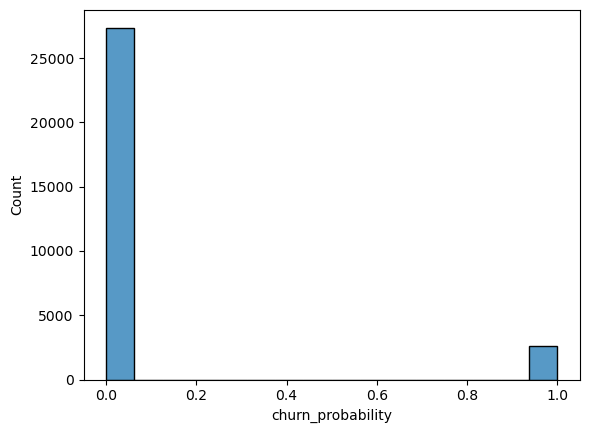

In [485]:
# Histplot of new churn probability predicted by the model

sns.histplot(output['churn_probability'])

In [948]:
## Submission file. Used to submit in Kaggle and upgrad platform.

output.to_csv('submission_pca_rf_06mar_36.csv',index=False)